## Python and R

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart

Some thoughts on why I like this setup and how I use it at the [end](notebook.ipynb#Thoughts) of  this notebook.

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [2]:
%%R


# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Read Data

In [5]:
election_results = pd.read_csv('election_results.csv')

NameError: name 'df' is not defined

## Ask a question

You can do this part in Python or in R. If you want to try it in R, don't forget to put `%%R -i df` at the top of the cell to import the `df` variable from Python into R. 

#### 🤔 WHAT IS YOUR QUESTION?

In [4]:
# 👉 how many more people are voting 3rd party?

Write code below to modify/pivot/etc the dataframe to answer your question. Perform any calculations you need.

In [28]:

state_changes = election_results[election_results['year'].isin([2020, 2024])].groupby(['state', 'year'])['other_pct'].mean().reset_index()

state_pivot = state_changes.pivot(index='state', columns='year', values='other_pct').reset_index()
state_pivot.columns = ['state', '2020', '2024']
state_pivot['change'] = state_pivot['2024'] - state_pivot['2020']
state_pivot

,state,2020,2024,change
0,American Samoa,2.537487,1.586817,-0.950671
1,Delaware,1.028605,1.111595,0.082989
2,Florida,1.085541,1.460636,0.375096
3,Georgia,0.994467,0.575834,-0.418633
4,Hawaii,2.161978,2.872305,0.710327
5,Idaho,2.695753,2.631812,-0.063941
6,Illinois,2.138025,2.102959,-0.035066
7,Indiana,2.125390,2.352331,0.226940
8,Iowa,1.748524,1.637334,-0.111189
9,Kansas,2.027886,1.978652,-0.049234


## Make some charts that help answer the question
You probably want to do this bit in R. You can find an example chart and map in `02-example.ipynb`

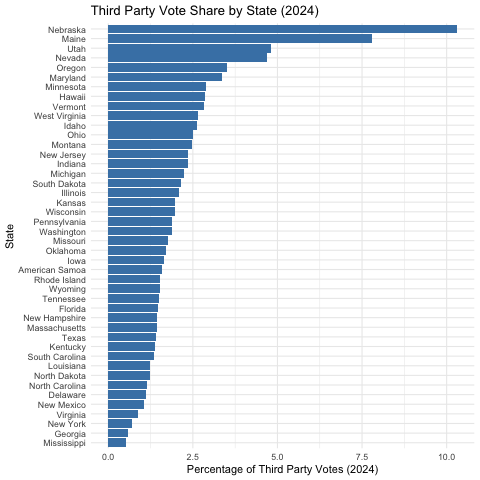

In [31]:
%%R -i state_pivot


ggplot(state_pivot, aes(x = reorder(state, `2024`), y = `2024`)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  theme_minimal() +
  labs(
    title = "Third Party Vote Share by State (2024)",
    x = "State",
    y = "Percentage of Third Party Votes (2024)"
  )
# ggplot or R code here

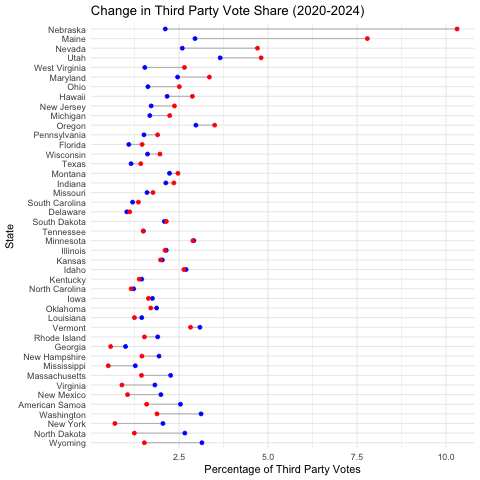

In [32]:
%%R -i state_pivot
ggplot(state_pivot, aes(y = reorder(state, change))) +
  geom_segment(aes(x = `2020`, xend = `2024`, yend = state), color = "gray") +
  geom_point(aes(x = `2020`), color = "blue") +
  geom_point(aes(x = `2024`), color = "red") +
  theme_minimal() +
  labs(
    title = "Change in Third Party Vote Share (2020-2024)",
    x = "Percentage of Third Party Votes",
    y = "State"
  )

# ggplot or R code here

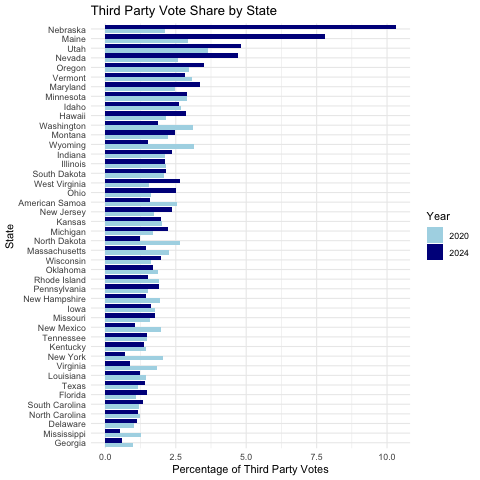

In [33]:
%%R -i state_pivot
state_pivot_long <- pivot_longer(state_pivot, 
                                cols = c("2020", "2024"), 
                                names_to = "year", 
                                values_to = "percentage")

ggplot(state_pivot_long, aes(x = reorder(state, percentage), y = percentage, fill = year)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "darkblue")) +
  labs(
    title = "Third Party Vote Share by State",
    x = "State",
    y = "Percentage of Third Party Votes",
    fill = "Year"
  )
# ggplot or R code here

# Short Memo

Write a short memo about what you found. It doesn't have to be a new discovery. Just do a little bit of googling and explain to me what you found and what further questions you have. Submit the Google Doc and a link to your GitHub repo with the code in courseworks. It doesn't have to be longer than a few lines or bullet points. Please include the relevant chart or graph. Remember, the goal is inquiry, not storytelling (yet). 

I actually felt like this was sooo interesting. It seems like Nebraska had a huge percentage change
of more third party voting percentage, which makes me wonder; why? I also found interesting that some states
had more third party than 2020, such as New York and Virginia. It seems that this election,
people tended to be more bipartisan than the past, except Nebraska, Maine, etc. Which is super weird. 